#Experimenting on <font color = "red"><u>*MNIST*</u> </font> dataset !

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt 
import time

**As MNIST is already concluded in Google Colab's datasets' list we can upload it just mentioning the path**

In [ ]:
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('sample_data/mnist_test.csv', header=None)

print("Train:", mnist_train.shape)
print("Test:", mnist_test.shape)

Train: (20000, 785)
Test: (10000, 785)


In [ ]:
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Let's <ins><font color = 'pytgtvgrsd'>*visualize*</ins></font> some data !

Firstly, we need a <font color= "jeir4ewtgtteeeeggrroeji">function</font> that would convert pixels into an image !

In [ ]:
def pixel_to_image(pixels):
  image = np.array(pixels, dtype = "float")
  pixel = image.reshape((28,28))
  plt.imshow(pixel, cmap = "gray")


Then we need to create some <font color = "dfiujhjhfhdf">subplots</font> to visualize multiple images at once 

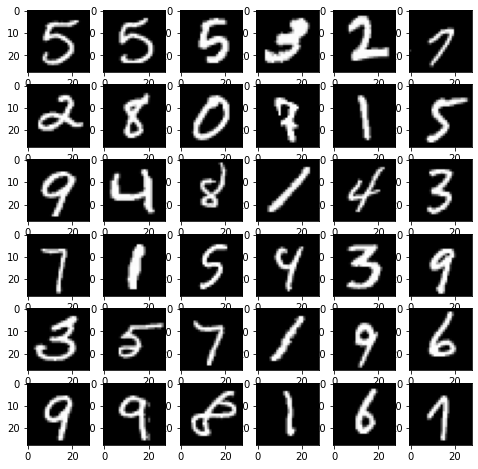

In [ ]:
fig = plt.figure(figsize = (8,8))
cols, rows = 6,6
for i in range(1,cols*rows+1):
  fig.add_subplot(rows, cols, i)
  pixel_to_image(mnist_train.iloc[i**2, 1:])

Another bunch of images just for fun ))

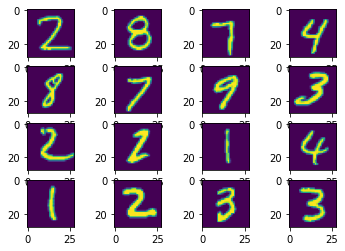

In [ ]:
def pixel_to_image(pixels):
  image = np.array(pixels, dtype = "float")
  pixel = image.reshape((28,28))
  plt.imshow(pixel) # without gray scale 
for i in range(1, 17):
  plt.subplot(4,4,i)
  pixel_to_image(mnist_train.iloc[i*2+66, 1:])  # starting from 1: because 0th col is the label 

In [ ]:
X_train, X_test, y_train, y_test = mnist_train.iloc[:, 1:], mnist_test.iloc[:, 1:], mnist_train.iloc[:, 0], mnist_test.iloc[:, 0]
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
X_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####For chechking the balance of our labels let's plot them !

Train data

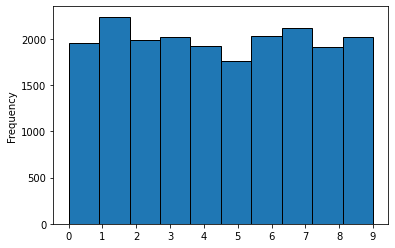

In [ ]:
y_train.plot(kind = "hist", edgecolor = "black",xticks=np.arange(10));

Test data

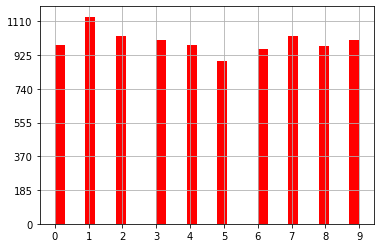

In [ ]:
y_test.hist(bins = 30, color = "red")
plt.xticks(range(10))
plt.yticks(range(0, 1295, 185));

#Now it's time to find the most optimal algorithm with corresponding hyperparameters

<b>As MNIST is somewhat big dataset for using Validation tools (time consuming) we can use a small portion of our DATA

In [ ]:
ids2 = np.random.choice(np.arange(10000), 2000) 
X_train_small, y_train_small = mnist_train.iloc[ids2, 1:], mnist_train.iloc[ids2, 0]
ids = np.random.choice(np.arange(10000), 1000) 
X_test_small, y_test_small = mnist_test.iloc[ids, 1:], mnist_test.iloc[ids, 0]
X_train_small.shape

(2000, 784)

###Finding best params for <font color = "rted">SupportVectorClassifier </font> and then testing it !

**As our data and parameters are too much, let's explore CV (cross-validation) with some parts** 

1.   Criterion : "poly"
2.   Criterion : "rbf"



**Here we consider that <font color = "djkbjd">kernel -> Polinomial </font> is the best option and trying to find the best parameters for this assumption.**

In [ ]:
model = SVC()
start = time.perf_counter()
parameters = {"kernel" : ["poly"], "degree" : [1,2,3], "C" : [0.01,0.1,1]}
clf = GridSearchCV(model, parameters, scoring = "accuracy", cv = 5)  # cv for cross_validation (number of folds)
clf.fit(X_train_small, y_train_small)
print( "time taken -> ",time.perf_counter() - start )
print(clf.best_params_)
clf.score(X_test_small, y_test_small)

time taken ->  168.94133010900077
{'C': 1, 'degree': 2, 'kernel': 'poly'}


0.931

**Here we consider that <font color = "djddndnndjkbkddehebdhekbjd">kernel -> Radial Basis Function </font> is the best option and trying to find the best parameters for this assumption.**

In [ ]:
model = SVC()
start = time.perf_counter()
parameters = {"kernel" : ["rbf"], "gamma" : [0.01,0.2,3, 10], "C" : [0.01,0.1,1]}
clf = GridSearchCV(model, parameters, scoring = "accuracy", cv = 5)  # cv for cross_validation (number of folds)
clf.fit(X_train_small, y_train_small)
print( "time taken -> ",time.perf_counter() - start )
print(clf.best_params_)
clf.score(X_test_small, y_test_small)

time taken ->  391.47555653300014
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


0.121

###We have seen all the possible versions of of SVC and no can apply the one with the highest accuracy on the model with the full Dataset.

In [ ]:
model = SVC(kernel = "poly" , C = 1, degree = 2)
start = time.perf_counter()
model.fit(X_train, y_train)
print( "time taken -> ",time.perf_counter() - start )
svm = model.score(X_test, y_test)
svm

time taken ->  86.28551069600007


0.9669

###It's interesting to have a look at some datapoints which our model did not manage to predict correctly

**1. Let's find the indexes of mispredicted labels** 

In [ ]:
start = time.perf_counter()
predictions = model.predict(X_test) # the variable model is responsible for SVC model (yet)
print (time.perf_counter() - start )
y_test[y_test != predictions]

61.9095700219998


8       5
124     7
241     9
245     3
247     4
       ..
9888    6
9904    2
9905    3
9944    3
9982    5
Name: 0, Length: 331, dtype: int64

**2. Now let's print some images from them for visualization and then print the actual and predicted labels to see the logic of our model**

(6, 5)
(4, 7)
(8, 9)
(5, 3)
(2, 4)
(0, 6)
(5, 2)
(9, 3)
(8, 3)
(3, 5)


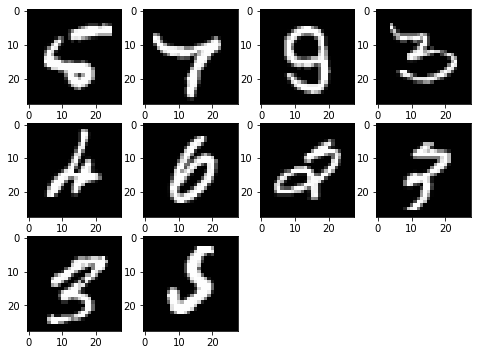

In [ ]:
false_indexes = [8,124,241,245,247,9888,9904,9905,9944,9982]
k = 0
fig = plt.figure(figsize = (8,8))
cols, rows = 4,4
for i in false_indexes:
  k += 1
  plt.subplot(4,4,k)
  pixel_to_image(X_test.iloc[i, :])   # from left to right, from top to bottom we have the order of datapoints
  print((predictions[i], y_test[i]))  # in front of the predicted labels we get the actaul one

###Finding best params for <font color = "oraheg">DecisionTreeClassifier</font> and then testing it !

1. **Cross - Validating on mini version of our dataset**

In [ ]:
model = DecisionTreeClassifier()
start = time.perf_counter()
parameters = {"max_depth" : np.arange(1, 10), 'min_samples_split' : np.arange(2,10), "criterion" : ("gini", "entropy") }
clf = GridSearchCV(model, parameters, scoring = "accuracy", cv = 5)
clf.fit(X_train_small, y_train_small)
print("time taken -> ", time.perf_counter() - start )
clf.best_params_, clf.score(X_test_small, y_test_small)

time taken ->  172.89654724899992


({'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}, 0.7)

2.  **Creating the model with best_params_ and then fitting the model on original Data**

In [ ]:
model = DecisionTreeClassifier(max_depth = 9, criterion = 'gini' , min_samples_split = 2)
start = time.perf_counter()
model.fit(X_train, y_train)
print (time.perf_counter() - start)
tree = model.score(X_test, y_test)
model.score(X_test, y_test)

2.542353362999961


0.8303

**We can plot a small part of our tree !**

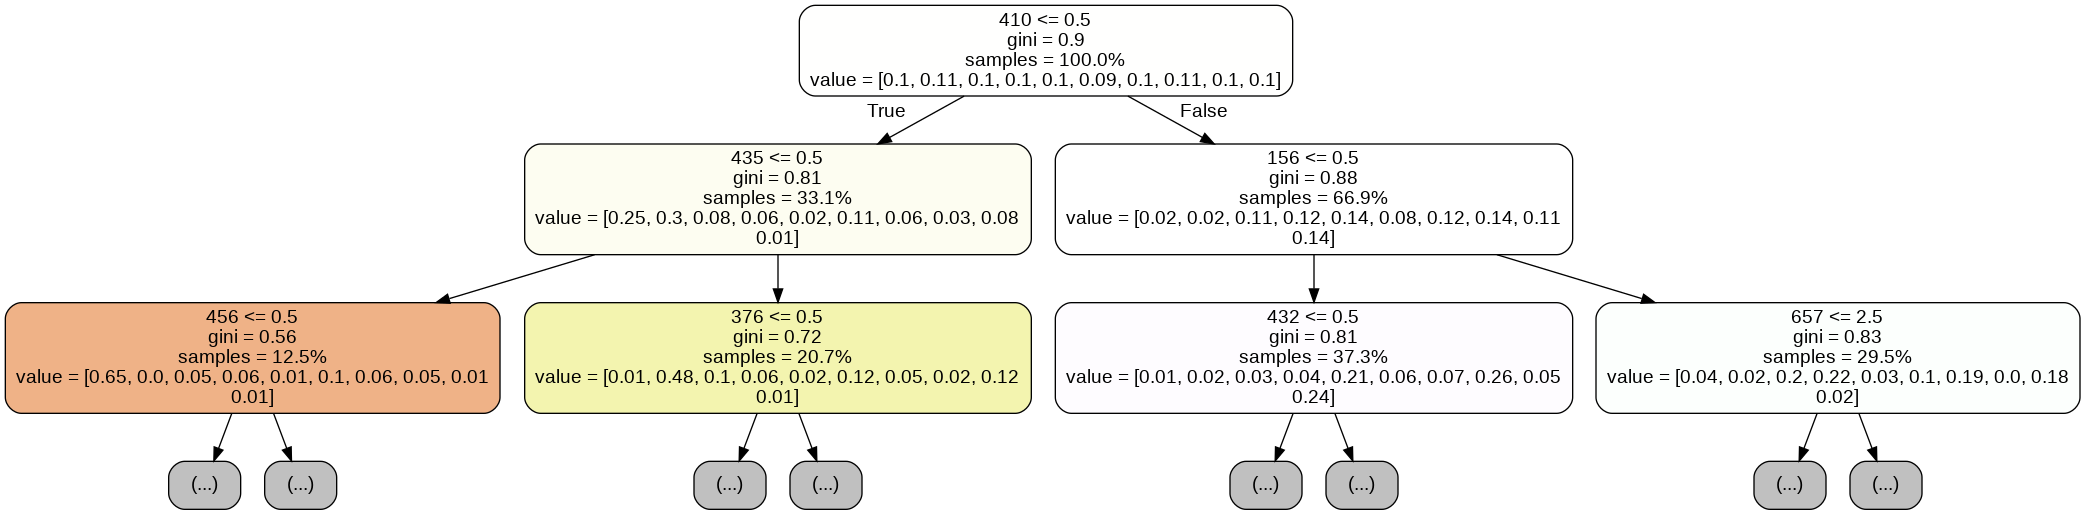

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(model, out_file=None, max_depth=2,
                        feature_names = X_train.columns,
                        rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

###We are already familiar with <font color = "dcbsjk"> Naive Bayes</font> from text_classification or categorical_data classification

1. Let's use <font color = 'hjdebhjsx'>MultinomialNB</font> which considers the frequencies

In [ ]:
model = MultinomialNB()
start = time.perf_counter()
clf = GridSearchCV(model, {"alpha" : [0.001,0.05,0.1, 0.55, 1]}, scoring = "accuracy" , cv = 5)
clf.fit(X_train, y_train)
print("time taken -> ",time.perf_counter() - start)
multi = clf.score(X_test, y_test)
clf.best_params_, clf.score(X_test, y_test)

time taken ->  10.910145474999808


({'alpha': 0.1}, 0.8348)

2. Let's use <font color = 'djnkjdnjdddddddddddddddddd'>BernoulliNB</font>  which considers the occurencies

In [ ]:
model = BernoulliNB()
start = time.perf_counter()
clf = GridSearchCV(model, {"alpha" : [0.001,0.05,0.1, 0.55, 1]}, scoring = "accuracy" , cv = 5)
clf.fit(X_train, y_train)
print("time taken -> ",time.perf_counter() - start)
berno = clf.score(X_test, y_test)
clf.best_params_, clf.score(X_test, y_test)

time taken ->  16.68664582600104


({'alpha': 0.001}, 0.8417)

<b>To conclude, let's plot the accuracies of 4models and compare them !

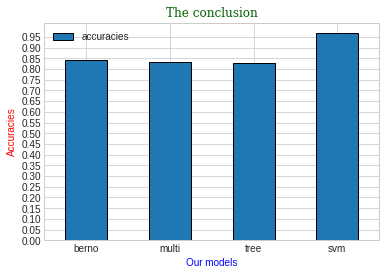

In [ ]:
sum_up = pd.DataFrame([berno, multi, tree, svm], index = ['berno', "multi", "tree", "svm"], columns= ["accuracies"])
sum_up.plot(kind = "bar" , edgecolor = "black")
plt.yticks(np.arange(0,1,0.05 ))
plt.xlabel("Our models", color = 'blue')
plt.ylabel('Accuracies', color = 'red')
plt.title('The conclusion', family = "serif" , color = "darkgreen")
plt.xticks(rotation = "horizontal");

##It's time to use more advanced methods <font color = "hbdhjbedebhjddhjbdjhh4jbehjdbhddheeew">(e.g. Ensemble Methods)

Let's start with <ins>*Bagging (Boostsrap AGGragating)* 

In [ ]:
from sklearn.ensemble import BaggingClassifier
start = time.perf_counter()
model = BaggingClassifier(random_state = 0)
model.fit(X_train_small, y_train_small)
print(f'The error rate of Training is {1-model.score(X_train_small, y_train_small)}')
print(f'The error rate of Testing is  {1-model.score(X_test_small, y_test_small)}')
print("Time taken ->", time.perf_counter() - start)

The error rate of Training is 0.0024999999999999467
The error rate of Testing is  0.15900000000000003
Time taken -> 2.029991427999903


####Let's plot the graphs of errors to determine

1.   **The minimums of our graphs -> optimal number of models**
2.   **Where our model stars to overfit**



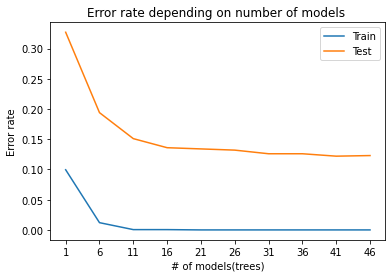

In [ ]:
errors_train = []
errors_test = []
interval = range(1, 51, 5)
for i in interval:
  model = BaggingClassifier(n_estimators=i, random_state = 0)
  model.fit(X_train_small, y_train_small)
  errors_train.append(1 - model.score(X_train_small, y_train_small))
  errors_test.append(1 - model.score(X_test_small, y_test_small))
plt.plot(interval, errors_train, label = "Train")
plt.plot(interval, errors_test, label = "Test")
plt.legend()
plt.title("Error rate depending on number of models ")
plt.xlabel("# of models(trees)")
plt.ylabel("Error rate")
plt.xticks(interval)
plt.show();

***It's easy to notice that starting from 30th tree the error is almost constant so there is no need to take more trees than 31.***

In [ ]:
model = BaggingClassifier(n_estimators=31)
start = time.perf_counter()
model.fit(X_train, y_train)
bagging = model.score(X_test,y_test)
print(f'The accuracy is {bagging}')
print("Time taken -> {}".format(time.perf_counter() - start))


The accuracy is 0.933
Time taken -> 106.15742869899987


###Let's pass to <font color = "hbdehbdehdbheejdvgege">RandomForest !

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_small, y_train_small)
print(f'The error rate of Training is {1-model.score(X_train_small, y_train_small)}')
print(f'The error rate of Testing is  {1-model.score(X_test_small, y_test_small)}')
print("Time taken ->", time.perf_counter() - start)

The error rate of Training is 0.0
The error rate of Testing is  0.07599999999999996
Time taken -> 163.47840457500024


**As we have really promising results <font color = "ddhjbdjhdhehehek">(>99%) accuracy </font>on Test Data, we can try to fit the whole data on the model.**

In [ ]:
model = RandomForestClassifier(random_state=0)
start = time.perf_counter()
model.fit(X_train, y_train)
print(model.score(X_test, y_test), "time taken ->", time.perf_counter() - start) # 0.9604 is very good in 14seconds !

0.9604 time taken -> 14.275254604999645


#####We can check simultaneously two hyperparameters and how the error rate varies !

Time taken -> 1871.863131659 



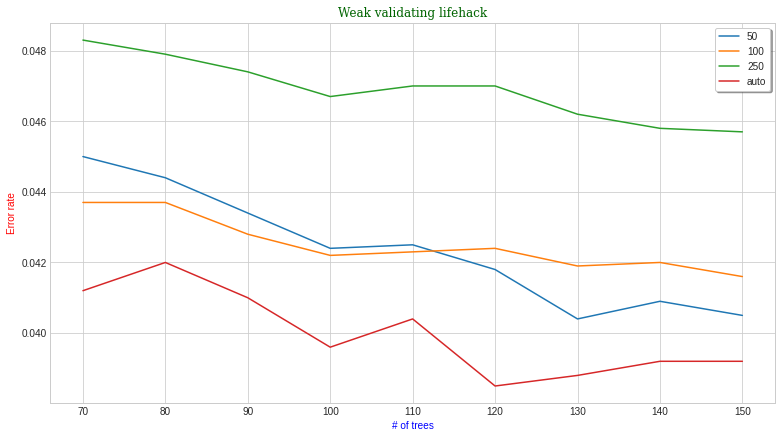

In [ ]:
plt.style.use('seaborn-whitegrid') # Plot style
fig = plt.figure(figsize = (13, 7))
size_of_estimators = range(70,151,10)
max_features = [50, 100, 250, "auto"]
start = time.perf_counter()
for i in max_features:
  h = []
  for j in size_of_estimators:
    model = RandomForestClassifier(random_state = 0, max_features = i, n_estimators = j)
    model.fit(X_train, y_train)
    h.append(1 - model.score(X_test, y_test))
  plt.plot(size_of_estimators, h, label = i)
print(f"Time taken -> {time.perf_counter() - start}", "\n")
plt.xticks(size_of_estimators)
plt.ylabel("Error rate", color = "red")
plt.xlabel("# of trees", color = "blue")
plt.title("Weak validating lifehack", family = "serif", color = "darkgreen" , fontsize = 12)
plt.legend(frameon = True, shadow=True)
plt.show();

Putting final tunned parameters (120 estimators) and get <font color = "bhjbrfhjr">0.11 % improvement !

In [ ]:
model = RandomForestClassifier(random_state=0, n_estimators = 120 , max_features="auto")
start = time.perf_counter()
model.fit(X_train, y_train)
randomforest = model.score(X_test, y_test)
print(randomforest, "time taken ->", time.perf_counter() - start) # 0.9615 instead of 0.9604 !

0.9615 time taken -> 16.774135535000823


###Finally, <font color = "jqqqqqff">AdaBoost !

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
start = time.perf_counter()
model.fit(X_train_small, y_train_small)
print(f'The accuracy -> {model.score(X_test_small, y_test_small)}')
print(f'Time taken -> {time.perf_counter() - start}')

The accuracy -> 0.455
Time taken -> 2.24024384599943


**We get worse than random guessing. Need to tune some parameters !**

Time taken-> 445.4981401919995


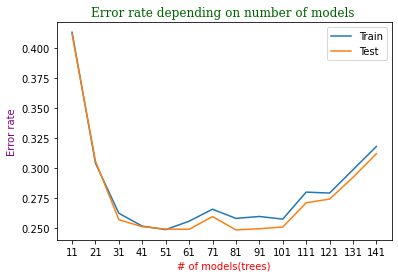

In [ ]:
errors_train = []
errors_test = []
interval = range(11, 151, 10)
start = time.perf_counter()
for i in interval:
  model = AdaBoostClassifier(n_estimators=i)
  model.fit(X_train, y_train)
  errors_train.append(1 - model.score(X_train, y_train))
  errors_test.append(1 - model.score(X_test, y_test))
plt.plot(interval, errors_train, label = "Train")
plt.plot(interval, errors_test, label = "Test")
print(f'Time taken-> {time.perf_counter() - start }')
plt.legend()
plt.title("Error rate depending on number of models ", color = "darkgreen", family = "serif" , fontsize = 12)
plt.xlabel("# of models(trees)", color = "red")
plt.ylabel("Error rate", color = "purple")
plt.xticks(interval)
plt.show();

No we can improve our model !

In [ ]:
model = AdaBoostClassifier(n_estimators=81)
start = time.perf_counter()
model.fit(X_train, y_train)
adaboost = model.score(X_test, y_test)
print("The Train Accuracy is {}".format(model.score(X_train, y_train)))
print("The Test Accuracy is {}".format(adaboost))
print(f'Time taken -> {time.perf_counter() - start}')

The Train Accuracy is 0.7416
The Test Accuracy is 0.7512
Time taken -> 33.66312524999921


<b>Remember that AdaBoost is effiecent for binary classification ! </b>

If you are interested in the details of Multi-class Adaboost, you can learn about it from the source [article](http://ww.web.stanford.edu/~hastie/Papers/SII-2-3-A8-Zhu.pdf).

##Time for final comparing

1. **Let's test <font color = "fnkfrrfnfbhjbfhrjedbhrffrr44">ensemble methods !**

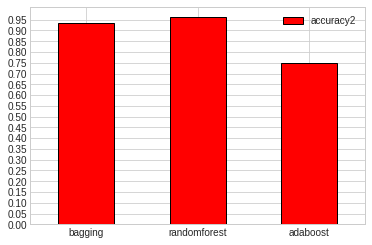

In [ ]:
target2 = [bagging, randomforest, adaboost]
X = pd.DataFrame(target2, index = ["bagging", "randomforest", "adaboost"], columns = ["accuracy2"])
X.plot(kind = "bar", edgecolor = "black", color = "red")
plt.yticks(np.arange(0,1,0.05))
plt.xticks(rotation = "horizontal");


2. **Capture the whole image !**

<Figure size 720x7200 with 0 Axes>

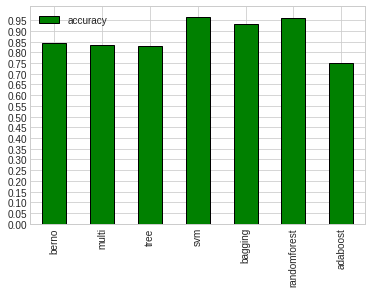

In [ ]:
fig = plt.figure(figsize = (10,100))
target1 = np.array(sum_up["accuracies"])
target2 = np.array(target2)
total_accuracies = np.concatenate((target1, target2))
index = np.concatenate((sum_up.index, X.index))
Finals = pd.DataFrame(total_accuracies, index = index, columns = ["accuracy"])
Finals.plot(kind = "bar", color = "green", edgecolor = "black")
plt.yticks(np.arange(0,1,0.05));


<b>Now we can conclude that the top 3 ML algorithms </b>(*we are familiar with*)<b> on MNIST dataset are</b>

1.   <font color = "red">  *SVM* </font> -> <ins>0.9669</ins>
2.   <font color = "blue">  *RandomForest*</font> -> <ins>0.9615</ins>
3.   <font color = "orange">  *Bagging*</font> -> <ins>0.9330</ins>
